# MNIST

In [59]:
import sys
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

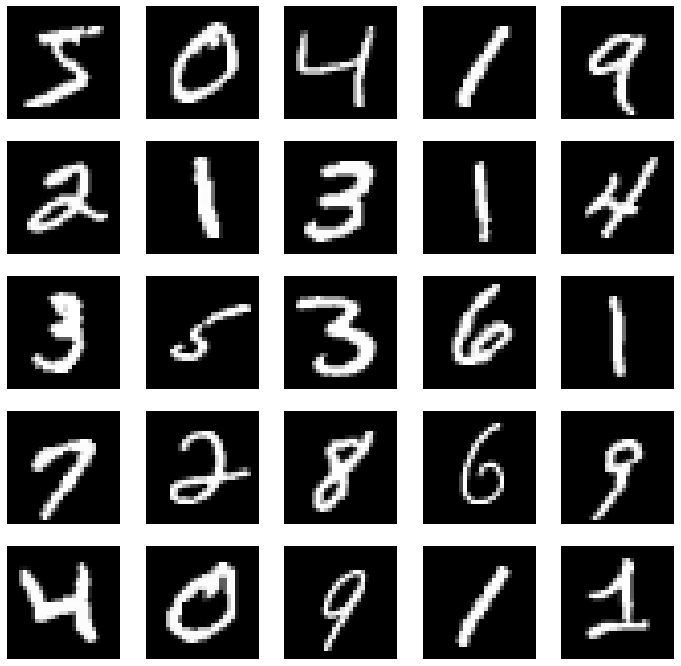

In [60]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()
axs
for i, ax in enumerate(axs.flat, start = 0):
  ax.axis('off')  # tat thuoc do
  ax.matshow(x_train[i])
  
fig.show()

# Preprocessing the MNIST images for Clustering algorithms

In [61]:
X_train = x_train.reshape(len(x_train), -1)
X_test = x_test.reshape(len(x_test), -1)

# normalize the data
X_train = X_train.astype(float) / 255 
X_test = X_test.astype(float) / 255 



# Y la cac nhan tuong ung voi x_train

In [62]:
n_digits = len(np.unique(y_train))
print(n_digits)

kmeans = KMeans(n_clusters=n_digits).fit(X_train)

Y_pred = kmeans.predict(X_test)

# 10 nhom tuong ung voi 10 so
# print(kmeans.cluster_centers_) 
# Y du doan tu X_test
# print(pred_label)
# y_test dung de so sanh voi Y_pred
# print(Y)

10


In [63]:
N0 = 20;
X1 = np.zeros((N0*n_digits, 784))
X2 = np.zeros((N0*n_digits, 784))

for k in range(n_digits):
    Xk = X_test[Y_pred == k, :]

    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(n_neighbors=N0, radius=0.5)
    neigh.fit(Xk)
    dist, nearest_id  = neigh.kneighbors(center_k, N0)
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]


<class 'numpy.ndarray'>
(784, 10)


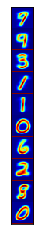

In [64]:
# Cac cluster_centers_

sys.path.append('/content/')
from display_network import *

print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, n_digits, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()

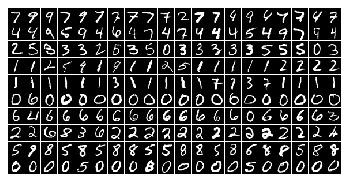

In [65]:
# Xuat ra 20 diem gan cac cluster_centers_ nhat

plt.axis('off')
A = display_network(X2.T, n_digits, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()